In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [114]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    

# Print the city count to confirm sufficient count
print(len(cities))
#cities



591


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [115]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    city_response = requests.get(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

     # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping xxxxxxx")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | turinskaya sloboda
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | 'ohonua
City not found. Skipping xxxxxxx
Processing Record 5 of Set 1 | banda aceh
Processing Record 6 of Set 1 | tinghir
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | kenai
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | larache
Processing Record 12 of Set 1 | smithers
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | mejit
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | chonchi
Processing Record 18 of Set 1 | pacific grove
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | flin flon
Processing Record 21 of Set 1 | thom

##HOLI

In [116]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

city_data_df


# Show Record Count
#city_data_df.count()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,11.70,88,11,0.95,AU,1718123570
1,turinskaya sloboda,57.6232,64.3858,15.85,71,53,1.89,RU,1718123571
2,grytviken,-54.2811,-36.5092,-6.70,79,20,5.48,GS,1718123571
3,banda aceh,5.5577,95.3222,27.63,82,95,5.53,ID,1718123571
4,tinghir,31.5157,-5.5343,28.30,23,44,4.83,MA,1718123571
...,...,...,...,...,...,...,...,...,...
561,heber city,40.5069,-111.4132,26.42,36,4,0.89,US,1718123634
562,jining,35.4050,116.5814,26.31,44,49,4.89,CN,1718123621
563,lospalos,-8.5186,127.0025,19.70,92,95,1.53,TL,1718123635
564,sosnogorsk,63.6023,53.8817,16.97,78,100,4.02,RU,1718123635


In [117]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [118]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,11.70,88,11,0.95,AU,1718123570
1,turinskaya sloboda,57.6232,64.3858,15.85,71,53,1.89,RU,1718123571
2,grytviken,-54.2811,-36.5092,-6.70,79,20,5.48,GS,1718123571
3,banda aceh,5.5577,95.3222,27.63,82,95,5.53,ID,1718123571
4,tinghir,31.5157,-5.5343,28.30,23,44,4.83,MA,1718123571


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

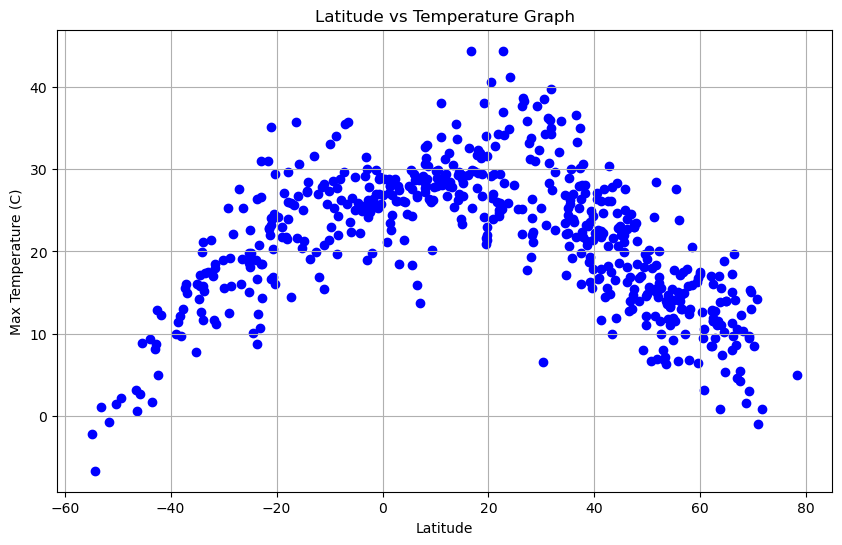

In [119]:
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker="o", color='b')

#Set the title and labels
plt.title('Latitude vs Temperature Graph')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.savefig("output_data/Fig1-Lat_vs_Temp.png")

plt.grid(True)
plt.show()


#### Latitude Vs. Humidity

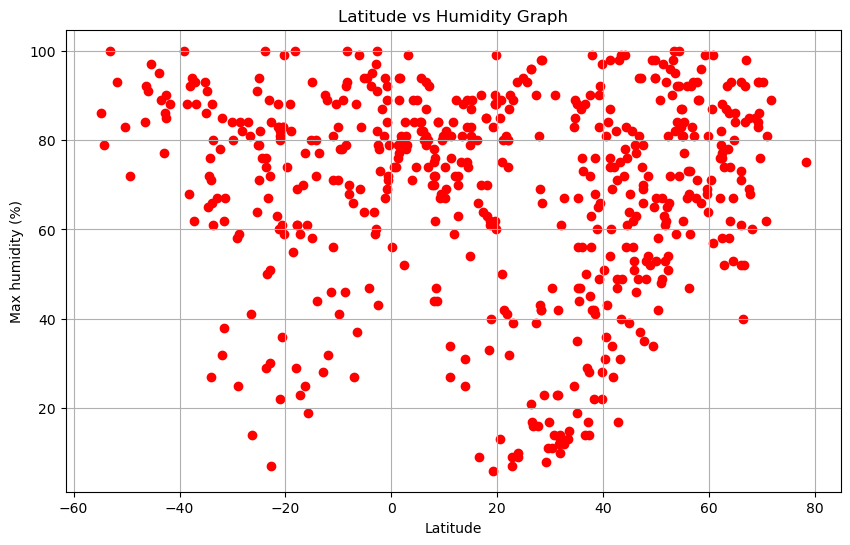

<Figure size 640x480 with 0 Axes>

In [120]:
# Build the scatter plots for latitude vs. humidity

plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker="o", color='r')

#Set the title and labels
plt.title('Latitude vs Humidity Graph')
plt.xlabel('Latitude')
plt.ylabel('Max humidity (%)')

plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig2-Lat_vs_Humid.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

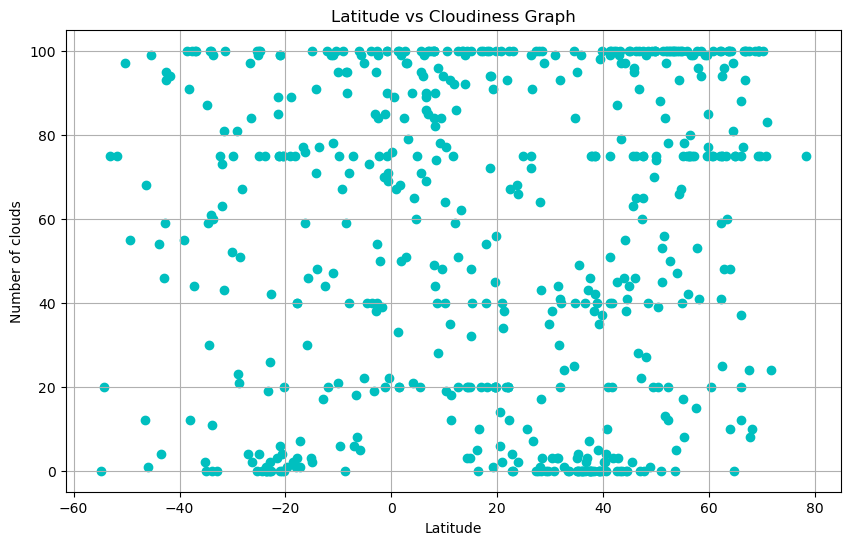

<Figure size 640x480 with 0 Axes>

In [121]:
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker="o", color='c')

#Set the title and labels
plt.title('Latitude vs Cloudiness Graph')
plt.xlabel('Latitude')
plt.ylabel('Number of clouds')

plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig3-Lat_vs_Cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

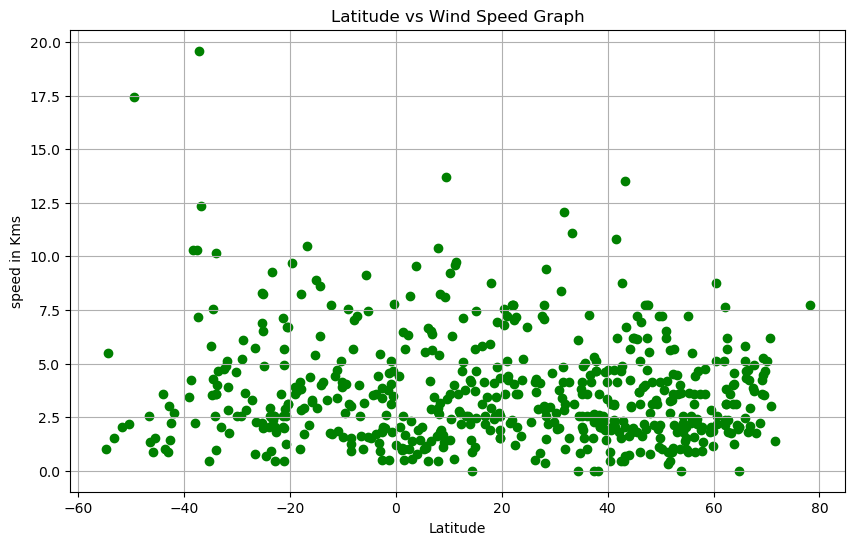

<Figure size 640x480 with 0 Axes>

In [122]:
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker="o", color='g')

#Set the title and labels
plt.title('Latitude vs Wind Speed Graph')
plt.xlabel('Latitude')
plt.ylabel('speed in Kms')

plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig4-Lat_vs_Speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


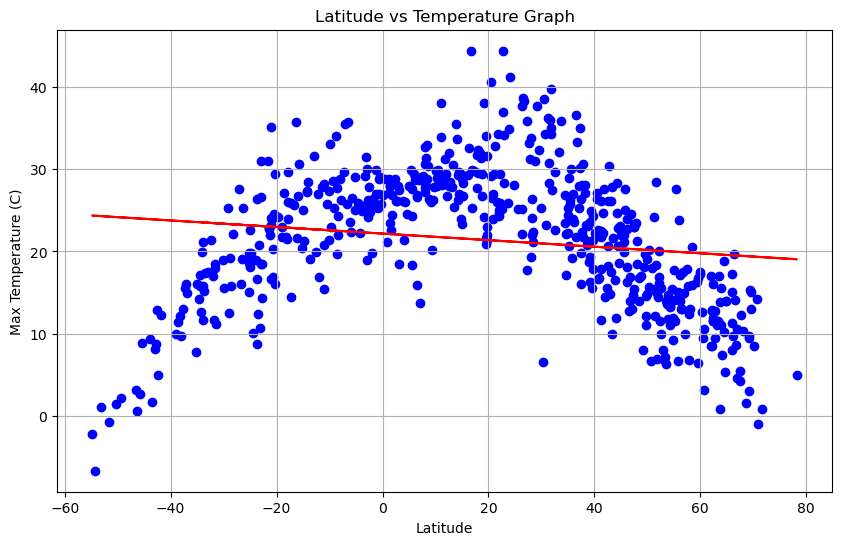

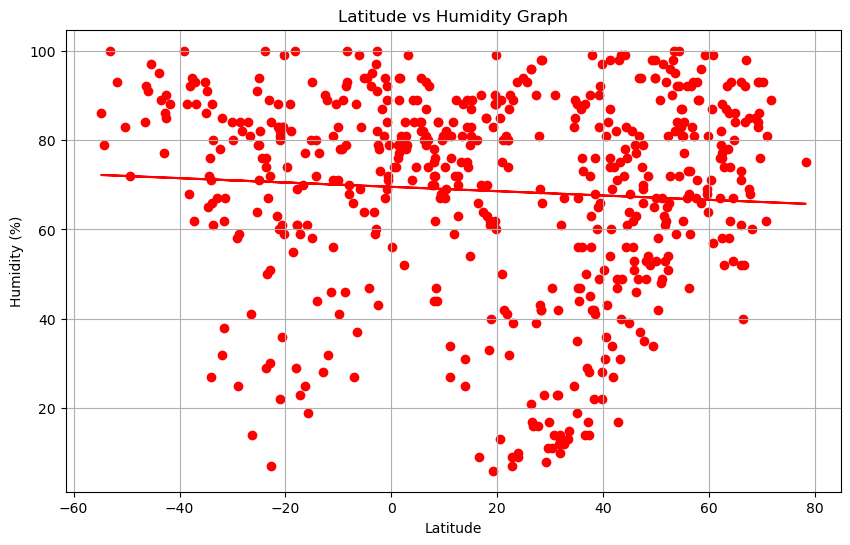

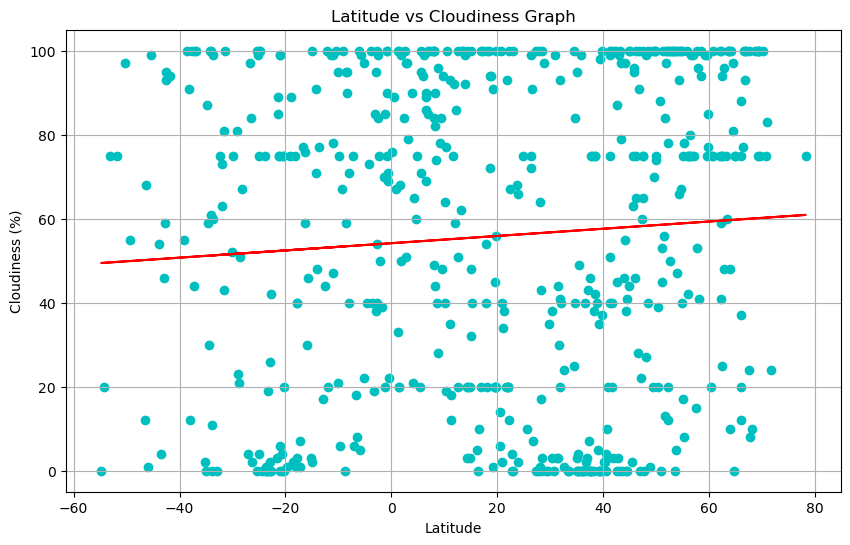

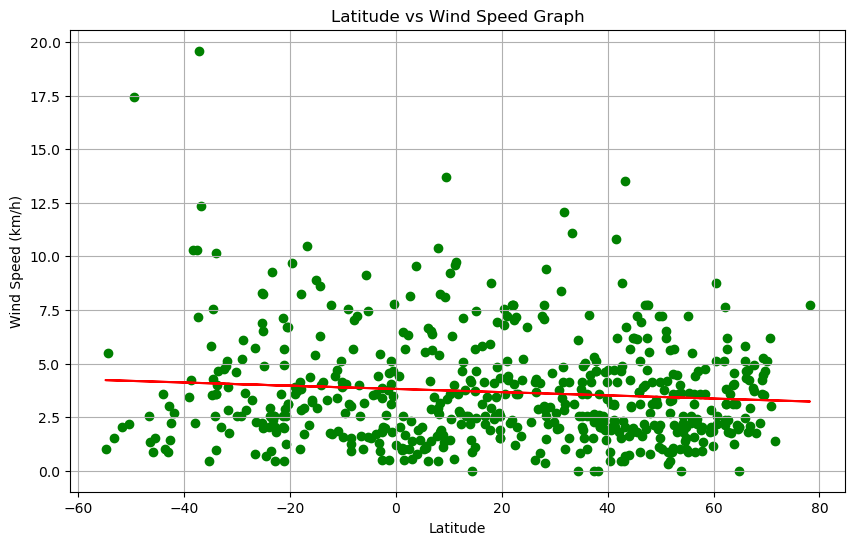

In [123]:
def plot_regression(x, y, xlabel, ylabel, title, color, save_path):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
    
    # Calculate regression line
    regression_line = slope * x + intercept

    # Plot scatter and regression line
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, marker="o", color=color)
    plt.plot(x, regression_line, color='red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.savefig(save_path)
    plt.show()

    # Latitude vs Temperature
plot_regression(city_data_df["Lat"], city_data_df["Max Temp"], 'Latitude', 'Max Temperature (C)', 'Latitude vs Temperature Graph', 'b', 'output_data/Fig1-r-Lat_vs_Temp.png')

# Latitude vs Humidity
plot_regression(city_data_df["Lat"], city_data_df["Humidity"], 'Latitude', 'Humidity (%)', 'Latitude vs Humidity Graph', 'r', 'output_data/Fig2-r-Lat_vs_Humid.png')

# Latitude vs Cloudiness
plot_regression(city_data_df["Lat"], city_data_df["Cloudiness"], 'Latitude', 'Cloudiness (%)', 'Latitude vs Cloudiness Graph', 'c', 'output_data/Fig3-r-Lat_vs_Cloud.png')

# Latitude vs Wind Speed
plot_regression(city_data_df["Lat"], city_data_df["Wind Speed"], 'Latitude', 'Wind Speed (km/h)', 'Latitude vs Wind Speed Graph', 'g', 'output_data/Fig4-r-Lat_vs_Speed.png')

In [124]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)


northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,turinskaya sloboda,57.6232,64.3858,15.85,71,53,1.89,RU,1718123571
3,banda aceh,5.5577,95.3222,27.63,82,95,5.53,ID,1718123571
4,tinghir,31.5157,-5.5343,28.30,23,44,4.83,MA,1718123571
6,kenai,60.5544,-151.2583,9.45,87,75,5.14,US,1718123571
8,bethel,41.3712,-73.4140,22.19,60,100,2.06,US,1718123540


In [125]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,11.70,88,11,0.95,AU,1718123570
2,grytviken,-54.2811,-36.5092,-6.70,79,20,5.48,GS,1718123571
5,adamstown,-25.0660,-130.1015,22.59,79,100,6.51,PN,1718123571
7,cidreira,-30.1811,-50.2056,19.02,84,52,4.62,BR,1718123571
13,waitangi,-43.9535,-176.5597,9.34,95,54,3.58,NZ,1718123572


###  Temperature vs. Latitude Linear Regression Plot

# Linear regression on Northern Hemisphere

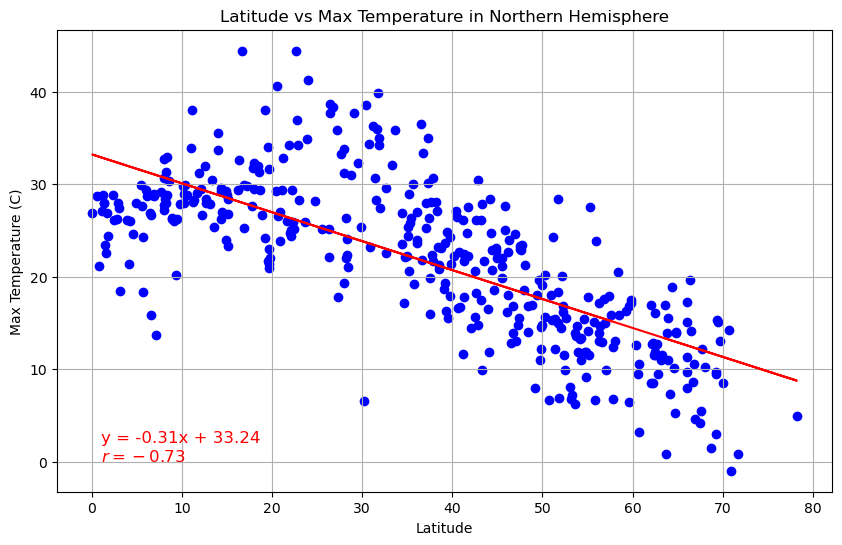

The r-value is: -0.7276092303012817


In [143]:
# Define the function to perform linear regression and plot
def plot_regression(x, y, xlabel, ylabel, title, color, save_path):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
    
    # Calculate regression line
    regression_line = slope * x + intercept
    
    # Plot scatter and regression line
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, marker="o", color=color)
    plt.plot(x, regression_line, color='red')

    equation_text = f'y = {slope:.2f}x + {intercept:.2f}\n$r = {r_value:.2f}$'
    plt.text(x.min() + 1, y.min() + 1, equation_text, fontsize=12, color='red')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.savefig(save_path)
    plt.show()
    
    return r_value

# Plot Latitude vs Max Temperature for the Northern Hemisphere
r_value = plot_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                          'Latitude', 'Max Temperature (C)', 
                          'Latitude vs Max Temperature in Northern Hemisphere', 
                          'b', 'output_data/NH_Lat_vs_Temp.png')

print(f"The r-value is: {r_value}")


# Linear regression on Southern Hemisphere

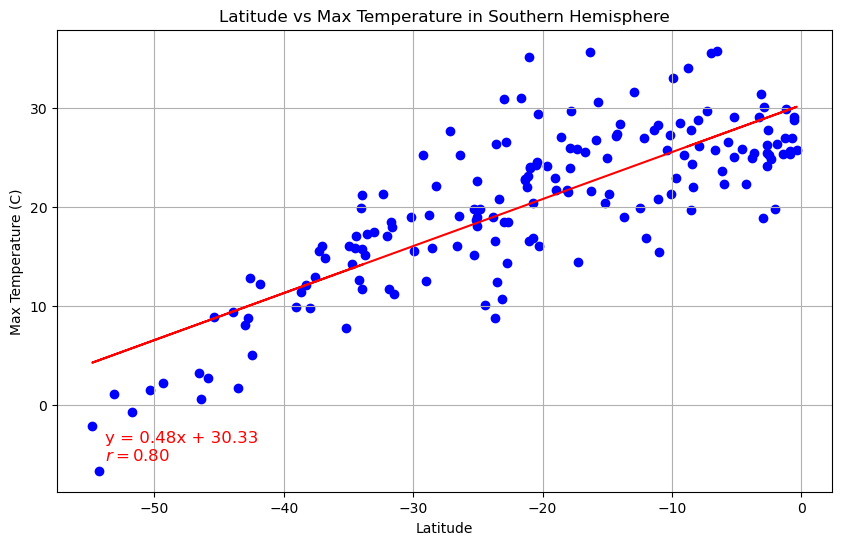

The r-value is: 0.8046718099737098


In [134]:
# Define the function to perform linear regression and plot
def plot_regression(x, y, xlabel, ylabel, title, color, save_path):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
    
    # Calculate regression line
    regression_line = slope * x + intercept
    
    # Plot scatter and regression line
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, marker="o", color=color)
    plt.plot(x, regression_line, color='red')

    equation_text = f'y = {slope:.2f}x + {intercept:.2f}\n$r = {r_value:.2f}$'
    plt.text(x.min() + 1, y.min() + 1, equation_text, fontsize=12, color='red')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.savefig(save_path)
    plt.show()
    
    return r_value

# Plot Latitude vs Max Temperature for the Northern Hemisphere
r_value = plot_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                          'Latitude', 'Max Temperature (C)', 
                          'Latitude vs Max Temperature in Southern Hemisphere', 
                          'b', 'output_data/SH_Lat_vs_Temp.png')

print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** Inverse Relationship:

Both graphs demonstrate an inverse relationship between latitude and maximum temperature when moving away from the equator.
The further from the equator, the colder the temperatures tend to be, regardless of hemisphere.

The symmetrical nature of the temperature distribution in both hemispheres indicates similar climate patterns: warmer near the equator and cooler towards the poles.

### Humidity vs. Latitude Linear Regression Plot

# Northern Hemisphere

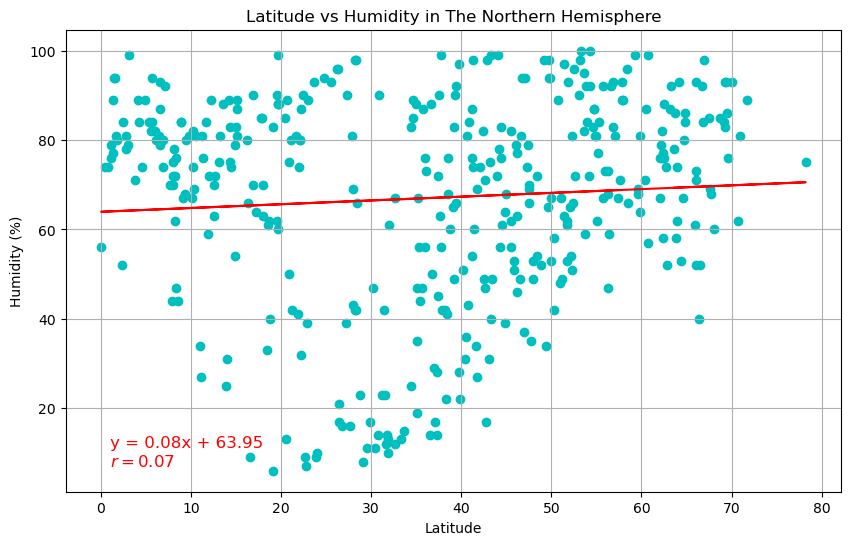

The r-value is: 0.07109739009714473


In [135]:
# Define the function to perform linear regression and plot
def plot_regression(x, y, xlabel, ylabel, title, color, save_path):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
    
    # Calculate regression line
    regression_line = slope * x + intercept
    
    # Plot scatter and regression line
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, marker="o", color="c")
    plt.plot(x, regression_line, color='red')

    equation_text = f'y = {slope:.2f}x + {intercept:.2f}\n$r = {r_value:.2f}$'
    plt.text(x.min() + 1, y.min() + 1, equation_text, fontsize=12, color='red')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.savefig(save_path)
    plt.show()
    
    return r_value

# Plot Latitude vs Himidy for the Northern Hemisphere
r_value = plot_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                          'Latitude', 'Humidity (%)', 
                          'Latitude vs Humidity in The Northern Hemisphere', 
                          'b', 'output_data/NH_Hum_vs_Temp.png')

print(f"The r-value is: {r_value}")

# Southern Hemisphere

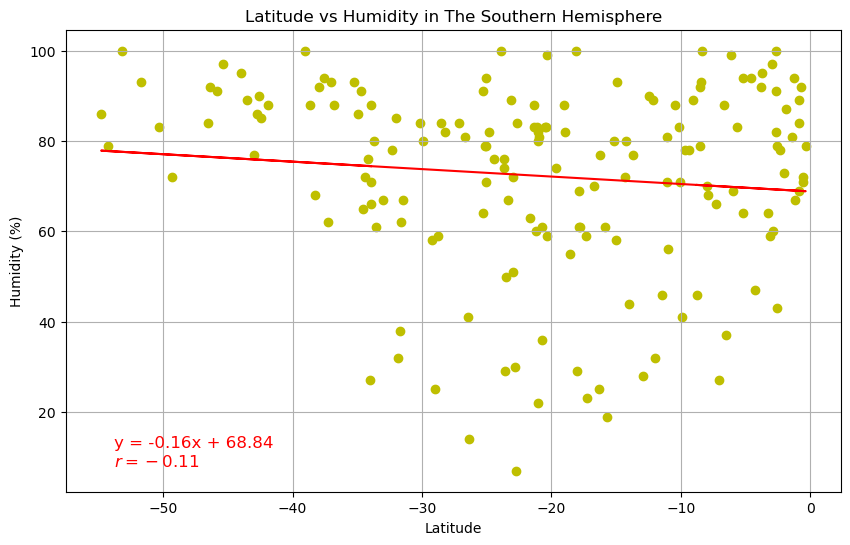

The r-value is: -0.10949926086851428


In [136]:
# Define the function to perform linear regression and plot
def plot_regression(x, y, xlabel, ylabel, title, color, save_path):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
    
    # Calculate regression line
    regression_line = slope * x + intercept
    
    # Plot scatter and regression line
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, marker="o", color="y")
    plt.plot(x, regression_line, color='red')

    equation_text = f'y = {slope:.2f}x + {intercept:.2f}\n$r = {r_value:.2f}$'
    plt.text(x.min() + 1, y.min() + 1, equation_text, fontsize=12, color='red')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.savefig(save_path)
    plt.show()
    
    return r_value

# Plot Latitude vs Max Humidity for the Northern Hemisphere
r_value = plot_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                          'Latitude', 'Humidity (%)', 
                          'Latitude vs Humidity in The Southern Hemisphere', 
                          'b', 'output_data/SH_Lat_vs_Hum.png')

print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** Inverse Relationship:

Both graphs show a very weak relationship between latitude and humidity.


These correlations indicate that latitude is not a strong predictor of humidity in either hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

# Northern Hemisphere

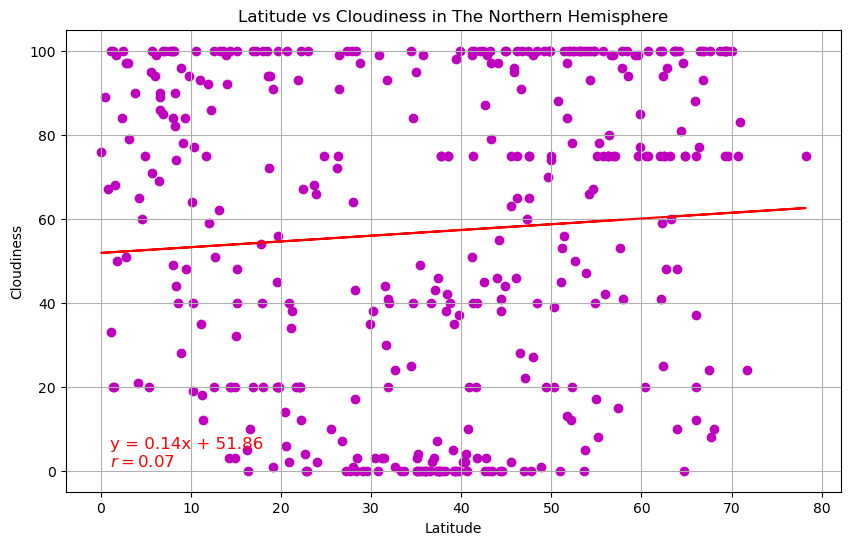

The r-value is: 0.0724291713754049


In [137]:
# Define the function to perform linear regression and plot
def plot_regression(x, y, xlabel, ylabel, title, color, save_path):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
    
    # Calculate regression line
    regression_line = slope * x + intercept
    
    # Plot scatter and regression line
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, marker="o", color="m")
    plt.plot(x, regression_line, color='red')

    equation_text = f'y = {slope:.2f}x + {intercept:.2f}\n$r = {r_value:.2f}$'
    plt.text(x.min() + 1, y.min() + 1, equation_text, fontsize=12, color='red')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.savefig(save_path)
    plt.show()
    
    return r_value

# Plot Latitude vs Himidy for the Northern Hemisphere
r_value = plot_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                          'Latitude', 'Cloudiness', 
                          'Latitude vs Cloudiness in The Northern Hemisphere', 
                          'b', 'output_data/NH_Lat_vs_cloud.png')

print(f"The r-value is: {r_value}")

# Southern Hemisphere

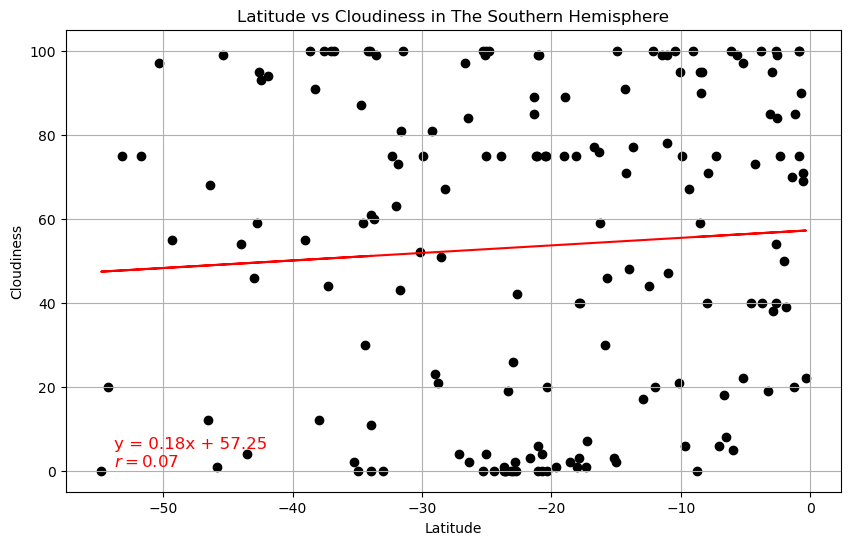

The r-value is: 0.06683054214791488


In [138]:
# Define the function to perform linear regression and plot
def plot_regression(x, y, xlabel, ylabel, title, color, save_path):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
    
    # Calculate regression line
    regression_line = slope * x + intercept
    
    # Plot scatter and regression line
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, marker="o", color="k")
    plt.plot(x, regression_line, color='red')

    equation_text = f'y = {slope:.2f}x + {intercept:.2f}\n$r = {r_value:.2f}$'
    plt.text(x.min() + 1, y.min() + 1, equation_text, fontsize=12, color='red')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.savefig(save_path)
    plt.show()
    
    return r_value

# Plot Latitude vs Max Humidity for the Northern Hemisphere
r_value = plot_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                          'Latitude', 'Cloudiness', 
                          'Latitude vs Cloudiness in The Southern Hemisphere', 
                          'b', 'output_data/SH_Lat_vs_Cloud.png')

print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** 

The r value of 0.07 pn both hemispheres indicates a very weak positive correlation between latitude and cloudiness. This means there is almost no linear relationship between latitude and cloudiness.

Observations suggest a higher concentration of cloudiness at higher latitudes in the Northern Hemisphere, despite the weak correlation. This could indicate other influencing factors or non-linear relationships

### Wind Speed vs. Latitude Linear Regression Plot

# Northern Hemisphere

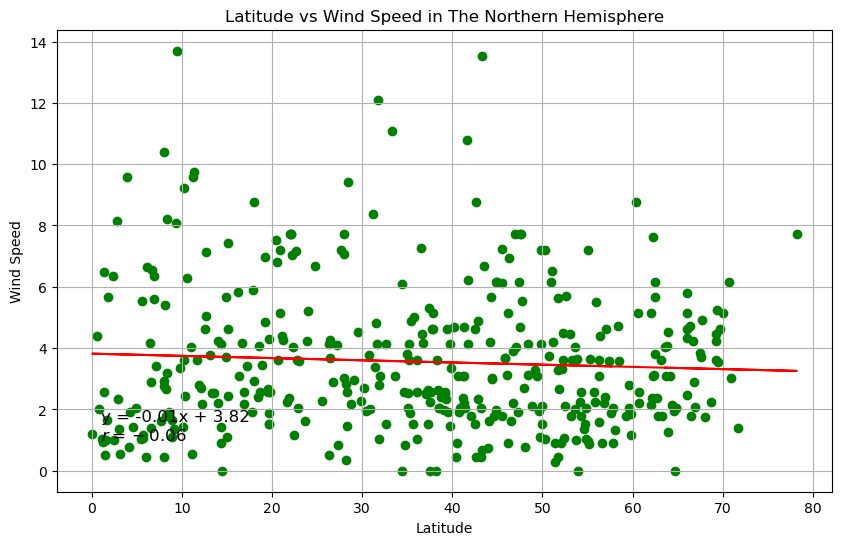

The r-value is: -0.06110947454990301


In [141]:
# Define the function to perform linear regression and plot
def plot_regression(x, y, xlabel, ylabel, title, color, save_path):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
    
    # Calculate regression line
    regression_line = slope * x + intercept
    
    # Plot scatter and regression line
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, marker="o", color="g")
    plt.plot(x, regression_line, color='red')

    equation_text = f'y = {slope:.2f}x + {intercept:.2f}\n$r = {r_value:.2f}$'
    plt.text(x.min() + 1, y.min() + 1, equation_text, fontsize=12, color='black')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.savefig(save_path)
    plt.show()
    
    return r_value

# Plot Latitude vs Himidy for the Northern Hemisphere
r_value = plot_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                          'Latitude', 'Wind Speed', 
                          'Latitude vs Wind Speed in The Northern Hemisphere', 
                          'b', 'output_data/NH_Lat_vs_Wind.png')

print(f"The r-value is: {r_value}")

# Southern Hemisphere

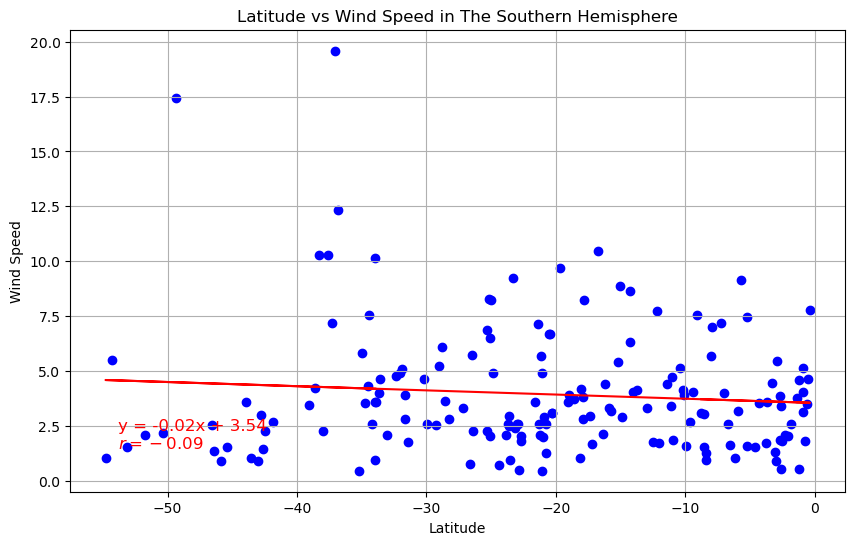

The r-value is: -0.09072083597450638 


In [142]:
# Define the function to perform linear regression and plot
def plot_regression(x, y, xlabel, ylabel, title, color, save_path):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
    
    # Calculate regression line
    regression_line = slope * x + intercept
    
    # Plot scatter and regression line
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, marker="o", color="b")
    plt.plot(x, regression_line, color='red')

    equation_text = f'y = {slope:.2f}x + {intercept:.2f}\n$r = {r_value:.2f}$'
    plt.text(x.min() + 1, y.min() + 1, equation_text, fontsize=12, color='red')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.savefig(save_path)
    plt.show()
    

    return r_value

# Plot Latitude vs Max Humidity for the Northern Hemisphere
r_value = plot_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                          'Latitude', 'Wind Speed', 
                          'Latitude vs Wind Speed in The Southern Hemisphere', 
                          'b', 'output_data/SH_Lat_vs_Speed.png')

print(f"The r-value is: {r_value} ")

**Discussion about the linear relationship:** 

The r value of -0.06 and -0.09 on the northern and southern hemisphere respectively  indicates a very weak negative correlation between latitude and Windspeed. This means there is almost no linear relationship between latitude and Windspeed.

The wide spread of data points suggests that factors other than latitude significantly influence wind speed.